GROCERY DATA ANALYSIS

In [2]:
import pandas as pd
import re
import numpy as np

In [3]:
df = pd.read_csv('GroceryDataset.csv')    # Load the dataset

In [4]:
df.head()    # Get an overview of the dataset

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [5]:
# Check for missing values
df.isna

<bound method DataFrame.isna of            Sub Category     Price     Discount  \
0     Bakery & Desserts   $56.99   No Discount   
1     Bakery & Desserts  $159.99   No Discount   
2     Bakery & Desserts   $44.99   No Discount   
3     Bakery & Desserts   $39.99   No Discount   
4     Bakery & Desserts   $59.99   No Discount   
...                 ...       ...          ...   
1752             Snacks   $23.99   No Discount   
1753             Snacks   $49.99   No Discount   
1754             Snacks   $22.99   No Discount   
1755             Snacks   $17.49   No Discount   
1756             Snacks   $21.99   No Discount   

                                               Rating  \
0      Rated 4.3 out of 5 stars based on 265 reviews.   
1          Rated 5 out of 5 stars based on 1 reviews.   
2      Rated 4.1 out of 5 stars based on 441 reviews.   
3     Rated 4.7 out of 5 stars based on 9459 reviews.   
4      Rated 4.5 out of 5 stars based on 758 reviews.   
...                      

# Data Cleaning

In [6]:
# Clean the Price column by handling ranges (extract the first price or average)
def clean_price(price):
    # Check if the price is a range (e.g., "32.99through-83.99")
    if 'through' in str(price):
        prices = re.findall(r'\d+\.\d+', str(price))  # Extract all numbers with decimals
        if len(prices) == 2:  # If there are two numbers, return the average of the range
            return (float(prices[0]) + float(prices[1])) / 2
    else:
        # Clean individual price by removing '$' and commas, then convert to float
        return float(re.sub(r'[\$,]', '', str(price)))
    
df['Price'] = df['Price'].apply(clean_price)

In [7]:
df.head(20)

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
5,Bakery & Desserts,59.99,No Discount,Rated 4.4 out of 5 stars based on 369 reviews.,David's Cookies Mango & Strawberry Cheesecake ...,$,2-count\nStrawberry Cheesecake\nMango Cheeseca...,Strawberry Cheesecake: There's only one way to...
6,Bakery & Desserts,74.99,No Discount,Rated 4.7 out of 5 stars based on 2241 reviews.,"La Grande Galette French Butter Cookies, 1.3 l...",$,"1.3 lb, 6-count\nBaked in, and Imported from, ...",Once upon a time in the French coastal town of...
7,Bakery & Desserts,59.99,No Discount,Rated 4.4 out of 5 stars based on 232 reviews.,David's Cookies No Sugar Added Cheesecake & Ma...,$,2-count\nNo Sugar Added\nKosher OU-Dairy,Creamy Dreamy:This smooth creamy cheesecake ha...
8,Bakery & Desserts,29.99,No Discount,Rated 4.4 out of 5 stars based on 1679 reviews.,David's Cookies Brownie and Cookie Combo Pack,$,6 Rocky Road Brownies\n12 Chocoloate Chunk Coo...,Due to the perishable nature of this product o...
9,Bakery & Desserts,159.99,No Discount,Rated 5 out of 5 stars based on 2 reviews.,"The Cake Bake Shop 8"" Round Chocolate Cake (16...",$,3 Layers of French Valrhona Chocolate Cake M...,"Due to the perishable nature of this item, ord..."


In [8]:
def clean_rating(rating):
    if isinstance(rating, str):
        # Check for "Rated X out of Y" format
        match = re.search(r'Rated (\d+\.\d+)', rating)
        if match:
            return float(match.group(1))
        
        # Handle "X out of Y" format like "5 out of 5"
        match = re.search(r'(\d+)\s*out of \d+', rating)
        if match:
            return float(match.group(1))
    return None  # Return None for cases that don't match the expected format

df['Rating'] = df['Rating'].apply(clean_rating)

In [9]:
# Clean the Product Description column
df['Product Description'] = df['Product Description'].str.replace(r'["\n]', '', regex=True)

In [10]:
# Handle missing values - filling missing ratings with the median
df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [11]:
# Define a function to clean the Discount column
def clean_discount(value):
    if isinstance(value, str):
        value = value.strip()  # Remove leading/trailing whitespace
        if value.lower() == "no discount":
            return 0  # No discount means 0
        elif re.search(r'\d+', value):  # If there's a numeric value in the string
            match = re.search(r'(\d+)', value)
            if match:
                return float(match.group(1))  # Extract the first numeric value
    return np.nan  # For unrecognized or missing formats, return NaN

# Apply the function to the Discount column
df['Discount'] = df['Discount'].apply(clean_discount)

# Fill missing discount values with 0 if applicable
df['Discount'].fillna(0, inplace=True)

In [12]:
# Handle missing values for other columns
df.fillna({
    'Price': df['Price'].median(),
    'Feature': 'None'
}, inplace=True)

In [13]:
# Remove duplicates and irrelevant columns
df.drop_duplicates(inplace=True)
df.drop(columns=['Currency'], inplace=True)  # Remove 'Currency' if it's unnecessary

In [14]:
# Display the cleaned data
print("Cleaned Data:")
print(df.head())

Cleaned Data:
        Sub Category   Price  Discount  Rating  \
0  Bakery & Desserts   56.99       0.0     4.3   
1  Bakery & Desserts  159.99       0.0     5.0   
2  Bakery & Desserts   44.99       0.0     4.1   
3  Bakery & Desserts   39.99       0.0     4.7   
4  Bakery & Desserts   59.99       0.0     4.5   

                                               Title  \
0  David’s Cookies Mile High Peanut Butter Cake, ...   
1  The Cake Bake Shop 8" Round Carrot Cake (16-22...   
2  St Michel Madeleine, Classic French Sponge Cak...   
3  David's Cookies Butter Pecan Meltaways 32 oz, ...   
4  David’s Cookies Premier Chocolate Cake, 7.2 lb...   

                                             Feature  \
0  "10"" Peanut Butter Cake\nCertified Kosher OU-...   
1  Spiced Carrot Cake with Cream Cheese Frosting ...   
2  100 count\nIndividually wrapped\nMade in and I...   
3  Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...   
4  "10" Four Layer Chocolate Cake\nCertified Kosh...   

           

In [15]:
df.to_csv('cleaned_grocery_data.csv', index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


# Feature Engineering

In [16]:
# Create a column to classify products as sustainable or not based on keywords like "organic", "eco-friendly", "recycled".

# Define sustainability keywords
sustainability_keywords = ['organic', 'eco-friendly', 'recycled', 'biodegradable', 'sustainable']

# Create a column indicating sustainability based on product description
def classify_sustainability(description):
    if isinstance(description, str):
        for keyword in sustainability_keywords:
            if keyword.lower() in description.lower():
                return 'Sustainable'
    return 'Non-Sustainable'

df['Sustainability'] = df['Product Description'].apply(classify_sustainability)

# Check counts of sustainable vs non-sustainable products
print("\nSustainability Classification Counts:")
print(df['Sustainability'].value_counts())



Sustainability Classification Counts:
Sustainability
Non-Sustainable    1538
Sustainable         216
Name: count, dtype: int64


In [17]:
df.to_csv('cleaned_grocery_data1.csv', index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


# Data Analysis and Visualisation


Summary Statistics:
             Price       Rating     Discount
count  1754.000000  1754.000000  1754.000000
mean     61.305941     4.443843     0.795895
std     121.391980     0.311812     5.329579
min       3.990000     1.000000     0.000000
25%      14.990000     4.500000     0.000000
50%      23.990000     4.500000     0.000000
75%      52.940000     4.500000     0.000000
max    1999.990000     5.000000    80.000000


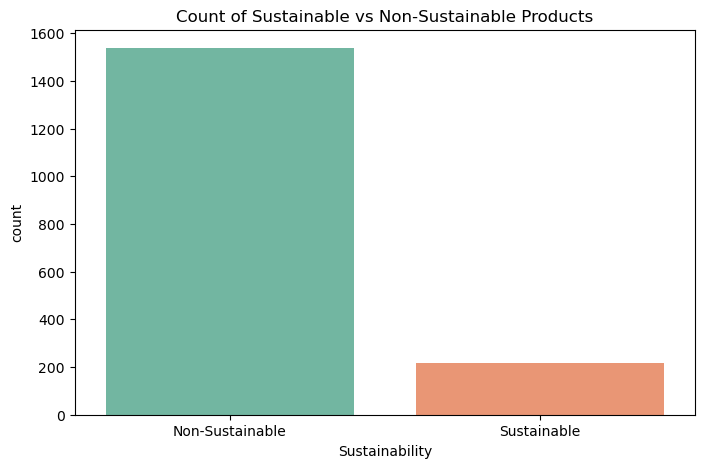

In [18]:
#Summary Statistics
#Summarize trends in prices, ratings, and discounts.

import matplotlib.pyplot as plt
import seaborn as sns

print("\nSummary Statistics:")
print(df[['Price', 'Rating', 'Discount']].describe())

# Countplot for sustainability
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sustainability', palette='Set2')
plt.title('Count of Sustainable vs Non-Sustainable Products')
plt.show()


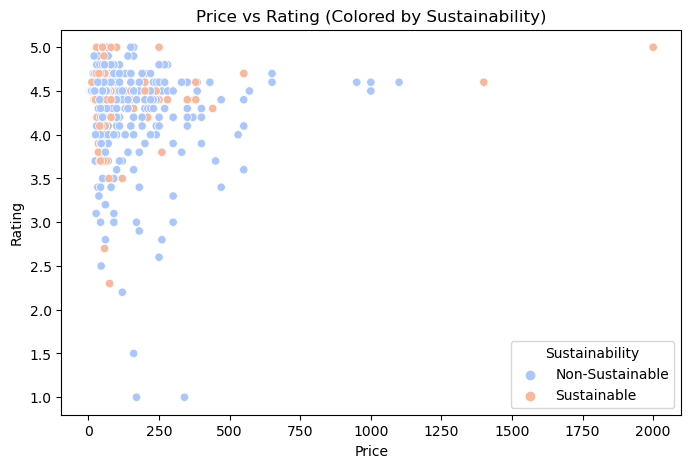

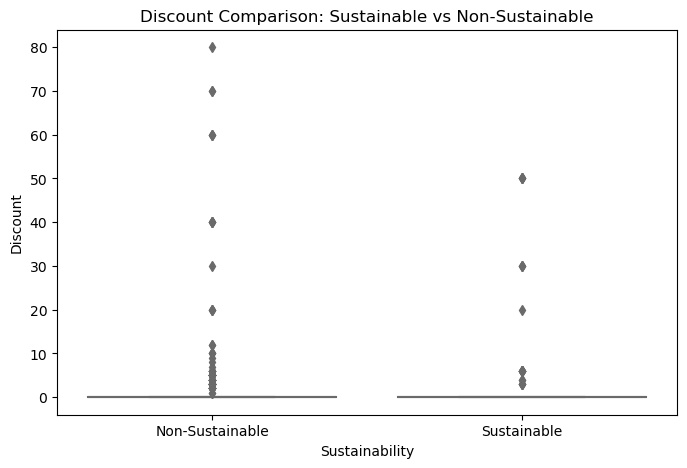

In [19]:
#Relationship Analysis
#Visualise relationships (price vs rating, sustainability vs purchases).

# Price vs Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Price', y='Rating', hue='Sustainability', palette='coolwarm')
plt.title('Price vs Rating (Colored by Sustainability)')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Sustainable vs Non-Sustainable Discounts
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sustainability', y='Discount', palette='Set3')
plt.title('Discount Comparison: Sustainable vs Non-Sustainable')
plt.show()


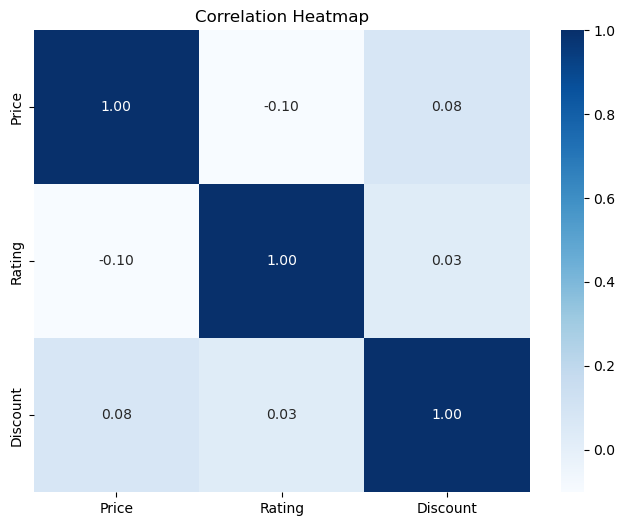

In [21]:
#Correlation Check
#Explore correlations between features like price, rating, and sustainability.

# Correlation heatmap
corr_matrix = df[['Price', 'Rating', 'Discount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
#Save Cleaned Data

df.to_csv('cleaned_grocery_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_grocery_data.csv'")

Cleaned dataset saved as 'cleaned_grocery_data.csv'
